<a href="https://colab.research.google.com/github/symgkhn/PythonDeepLearning/blob/main/VGG16_NesneTanima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [6]:
import os 
os.chdir("/gdrive/MyDrive/Çalışma_Ortamı/")

In [7]:

!ls

'Aktivasyon Fonksiyonları.ipynb'     MNIST_YSA.ipynb
 Çalışma1.ipynb			     RakamTanima_CNN.ipynb
 EvrişimliSinirAğı.ipynb	     RakamTanıma_CNN.ipynb
 Fashion_MNIST.ipynb		    'Vektörler Matrisler Tensörler.ipynb'
 GradientDescent_Algoritması.ipynb   VGG16_NesneTanima.ipynb
'Katmanlar ve Modeller.ipynb'


### Kütüphane kurulumu

In [8]:

!pip3 install -q keras

### VGG16 eğitilmiş modeli

In [9]:
import numpy as np
from PIL import Image

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions

### Keras'ta önceden ImageNet veri kümesinde eğitilmiş bir modeli yükleme

In [10]:
model = VGG16(weights = 'imagenet', include_top=True)

553467904/553467096 [==============================] - 3s 0us/step


In [11]:
layers = dict([(layer.name, layer.output) for layer in model.layers])
layers

{'block1_conv1': <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv1')>,
 'block1_conv2': <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv2')>,
 'block1_pool': <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'block1_pool')>,
 'block2_conv1': <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv1')>,
 'block2_conv2': <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv2')>,
 'block2_pool': <KerasTensor: shape=(None, 56, 56, 128) dtype=float32 (created by layer 'block2_pool')>,
 'block3_conv1': <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv1')>,
 'block3_conv2': <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv2')>,
 'block3_conv3': <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv3')>,
 'block3_pool': <KerasTensor: shap

In [12]:
model.count_params()

138357544

In [14]:
import os
os.chdir("/gdrive/MyDrive/Çalışma_Ortamı/images")

In [15]:

!ls

kedi1.jpg  kedi.jpg  köpek1.jpg  köpek.jpg


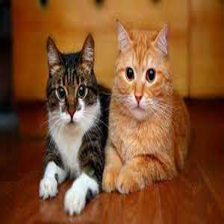

In [16]:
image_path = 'kedi.jpg'
image = Image.open(image_path) 
image = image.resize((224, 224))
image

In [17]:
x = np.array(image, dtype = 'float32') #görüntüyü diziye çevirir
x = np.expand_dims(x, axis=0) #dizi listesine çevirir
x= preprocess_input(x)

## Test Görüntüsü ile Sınıflandırma Yapma

In [18]:
preds = model.predict(x)
print('predicted:', decode_predictions(preds, top=3)[0])
print(decode_predictions(preds, top=1)[0][0][1])

40960/35363 [==================================] - 0s 0us/step
predicted: [('n02123045', 'tabby', 0.3712429), ('n02123159', 'tiger_cat', 0.20230089), ('n02124075', 'Egyptian_cat', 0.12661006)]
tabby
